<div style="text-align: right"><i>Ivy Zhang<br>2024</i></div>

# Mandlebrot Set

The Mandlebrot Set is defined as all the values *c* in the complex number plane which don't diverge on the term $f_c(z) = z^2 + c$. While the mathematical definition seems quite boring, our final set generates beautiful fractals out of this simplicity.

To generate an image, we'll have to generate the matrix of *c* values to test, run an interative function to check divergence, and then plot the valid values at the end.

I'm going to try and recreate the first published picture of the set:

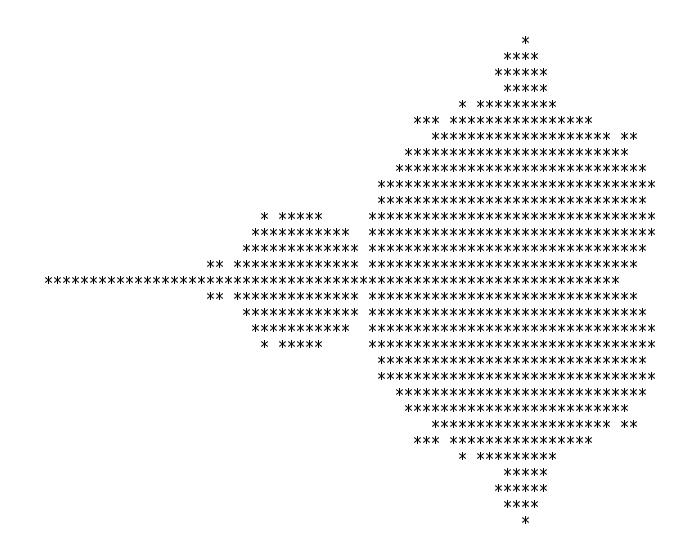

In [80]:
import numpy as np
from IPython.display import display, HTML

## Generating Matrix

I'm not doing anything fancy here besides using some basic broadcasting to get our filled out 2D grid.

In [81]:
def generate_c_matrix(x_lo, x_hi, y_lo, y_hi, step_size=0.25):
    xs = np.arange(x_lo, x_hi, step_size)[np.newaxis, :]
    ys = np.arange(y_lo, y_hi, step_size)[:, np.newaxis]
    return (xs + (ys * 1j))

In [82]:
def mandlebrot_iter(parameters, iters=100):
    z = np.zeros_like(parameters)
    for _ in range(iters):
        z = np.square(z) + parameters
        
        # It diverges if the absolute value ever goes above 2
        # Replace with np.nan since this shouldn't undergo any operations
        z[np.abs(z) >= 2] = np.nan 
    return z

In [83]:
possible_c = generate_c_matrix(-2, 0.5, -1, 1, 0.05)
valid_c = mandlebrot_iter(possible_c, 50)
valid_idx = np.argwhere(np.isfinite(valid_c))

The picture code blow is shamelessly taken from [Peter Norvig's notebook on GoL](https://github.com/norvig/pytudes/blob/main/ipynb/Life.ipynb).

In [84]:
VALID   = 'X'
INVALID = ' '
PAD     = ' '
        
def picture(world, Xs: range, Ys: range) -> str:
    """Return a picture of the world: a grid of characters representing the cells in this window."""
    def row(y): return PAD.join(VALID if (x, y) in world else INVALID for x in Xs)
    return '\n'.join(row(y) for y in Ys)

In [85]:
g = set([(x, y) for x, y in zip(valid_idx[:, 1], valid_idx[:, 0])])
pic = picture(g, range(possible_c.shape[1]), range(possible_c.shape[0]))
print(pic)

                                                                                                   
                                                                                                   
                                                                                                   
                                                                            X                      
                                                                        X X X X                    
                                                                        X X X X                    
                                                                        X X X X                    
                                                                X   X X X X X X                    
                                                            X     X X X X X X X X X X              
                                                          X X X X X X X X X X X X X X X X X X      
